In [42]:
from skyfield.api import Star, load, Angle
import numpy as np
import matplotlib.pyplot as plt
import lensutils as util 
import sqlutil as sqlutil
from astropy.time import Time 

mas_to_deg = 0.0000002777777

SourcePPMXLid = 6197608744359075309
TGASLensId = 5332606518269523072
GaiaSourceId = 5332606346467258496

querystringGAIASource = 'select ra, dec from gaia_dr1.gaia_source where source_id=' + str(GaiaSourceId)
querystringTGAS = 'select ra, dec,pmra,pmdec,parallax from gaia_dr1.tgas_source where source_id=' + str(TGASLensId)
querystringPPMXL ='select pmra,pmdec from ppmxl.main where id=' + str(SourcePPMXLid)


lensRa, lensDec,pmra,pmdec,parallax = sqlutil.get(querystringTGAS,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')
spmra,spmdec = sqlutil.get(querystringPPMXL,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')
sourceRa, sourceDec = sqlutil.get(querystringGAIASource,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')
planets = load('de421.bsp')
earth = planets['earth']


print(spmdec)
#compute position of lens at epoch 2000.0
raCosDec = (lensRa*np.cos(np.deg2rad(lensDec))) + (2000.0 - 2015.0)* pmra * mas_to_deg
dec2000 = lensDec + (2000.0 - 2015.0) * pmdec * mas_to_deg
ra2000 = raCosDec / np.cos(np.deg2rad(lensDec))

#compute position of source at epoch 2000.0
sraCosDec = (sourceRa*np.cos(np.deg2rad(sourceDec))) + (2000.0 - 2015.0)* spmra * mas_to_deg
sdec2000 = sourceDec + (2000.0 - 2015.0) * spmdec * mas_to_deg
sra2000 = sraCosDec / np.cos(np.deg2rad(sourceDec))

lens = Star(ra=Angle(degrees=lensRa[0]),
               dec=Angle(degrees=lensDec[0]),
               ra_mas_per_year=pmra[0],
               dec_mas_per_year=pmdec[0],
               parallax_mas=parallax[0])

source = Star(ra=Angle(degrees=sourceRa[0]),
               dec=Angle(degrees=sourceDec[0]),
               ra_mas_per_year=spmra[0],
               dec_mas_per_year=spmdec[0],
               parallax_mas=0)

ts = load.timescale()
t = ts.utc(2003,range(0,50))

ravals = []
decvals = []
ravalsSource = []
decvalsSource = []
time = []

#
timearray = np.linspace(1,50,num=50)




for i in range(0,50):
    astrometric = earth.at(t[i]).observe(lens)
    rai, deci, distancesa = astrometric.radec()
    
    astrometricSource = earth.at(t[i]).observe(source)
    ras, decs, distancess = astrometricSource.radec()
    
    ravals = np.append(ravals,rai._degrees)
    decvals= np.append(decvals,deci._degrees)
    
    ravalsSource = np.append(ravalsSource,ras._degrees)
    decvalsSource = np.append(decvalsSource,decs._degrees)
    
print(len(ravals))
print(timearray)

[-17.89999962]
50
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.]


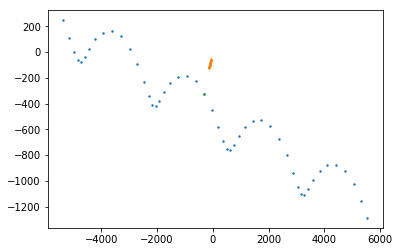

In [48]:
plt.scatter((ravals-sourceRa)*np.cos(np.deg2rad(sourceDec))/mas_to_deg,(decvals-sourceDec)/mas_to_deg,s=2)
plt.scatter((ravalsSource-sourceRa)*np.cos(np.deg2rad(sourceDec))/mas_to_deg,(decvalsSource-sourceDec)/mas_to_deg,s=0.5)
dist = np.hypot((ravals-ravalsSource)*np.cos(np.deg2rad(sourceDec)),decvals-decvalsSource) / mas_to_deg
minpos = np.argmin(dist)
plt.scatter((ravals[minpos]-sourceRa)*np.cos(np.deg2rad(sourceDec))/mas_to_deg,(decvals[minpos]-sourceDec)/mas_to_deg,s=2)
plt.show()

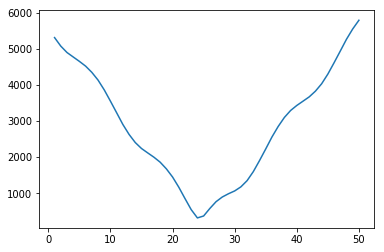

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [49]:

time = str(t.utc_datetime())
#print(time)

#julianyeartimes = [2002.9993155373031,2003.0841889117044,2003.160848733744,2003.2457221081452,
#                   2003.3278576317591,2003.4127310061601,2003.494866529774,2003.5797399041753,
#                    2003.6646132785763,2003.7467488021903,2003.8316221765913,2003.9137577002055,
#                  2003.9986310746065,2004.0835044490075,2004.1629021218343,2004.2477754962354,
#                   2004.3299110198493,2004.4147843942505,2004.4969199178645,2004.5817932922655,
#                   2004.6666666666667,2004.7488021902807,2004.833675564681,2004.9158110882956]
plt.clf()
plt.plot(timearray,dist)
plt.show()
plt.scatter()

In [14]:
timeast = Time('2004-12-01')
timeast.format = 'jyear'
print(timeast)

2004.9158110882956
